import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "Country_Level_Results_by_Modality_Coarse_Age_and_Sex.txt"
try:
    data = pd.read_csv(file_path, delimiter="\t")
    print("Dataset successfully loaded!")
except FileNotFoundError:
    print("Dataset not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset successfully loaded!


In [3]:
print("\nDataset Overview:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13518 entries, 0 to 13517
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Operating Unit  13518 non-null  object
 1   Country         13518 non-null  object
 2   ISO3            13518 non-null  object
 3   Indicator       13518 non-null  object
 4   Description     13518 non-null  object
 5   Coarse Age      13518 non-null  object
 6   Sex             13518 non-null  object
 7   Modality        7961 non-null   object
 8   2018-T          2194 non-null   object
 9   2018Q1-R        2127 non-null   object
 10  2018Q2-R        2647 non-null   object
 11  2018Q3-R        2206 non-null   object
 12  2018Q4-R        2967 non-null   object
 13  2019-T          2140 non-null   object
 14  2019Q1-R        3275 non-null   object
 15  2019Q2-R        3787 non-null   object
 16  2019Q3-R        3297 non-null   object
 17  2019Q4-R        3831 non-null  

In [4]:
# Remove unnecessary columns (e.g., columns with mostly missing values or redundant data)
columns_to_drop = data.columns[data.isnull().mean() > 0.9]
data_cleaned = data.drop(columns=columns_to_drop)

In [5]:
missing_values = data_cleaned.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Modality     5557
2018-T      11324
2018Q1-R    11391
2018Q2-R    10871
2018Q3-R    11312
2018Q4-R    10551
2019-T      11378
2019Q1-R    10243
2019Q2-R     9731
2019Q3-R    10221
2019Q4-R     9687
2020-T      10299
2020Q1-R     8197
2020Q2-R     7488
2020Q3-R     8169
2020Q4-R     7401
2021-T       9801
2021Q1-R     7849
2021Q2-R     7055
2021Q3-R     7421
2021Q4-R     6730
2022-T       9545
2022Q1-R     7014
2022Q2-R     6139
2022Q3-R     6836
2022Q4-R     5994
2023-T       9090
2023Q1-R     6832
2023Q2-R     5954
2023Q3-R     6628
2023Q4-R     6025
2024-T      10380
2024Q1-R     6550
2024Q2-R     5674
2024Q3-R     6553
dtype: int64


In [6]:
# Replace missing values in numeric columns with 0 (if applicable)
numeric_columns = data_cleaned.columns[8:]  # Adjust indices for numeric columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

In [7]:
# Standardize text columns (e.g., remove unnecessary capitalization)
data_cleaned['Country'] = data_cleaned['Country'].str.title()
data_cleaned['Modality'] = data_cleaned['Modality'].str.lower()

In [8]:
print("\nDescriptive Statistics:")
print(data_cleaned.describe())


Descriptive Statistics:
             2018-T      2018Q1-R      2018Q2-R      2018Q3-R      2018Q4-R  \
count  13518.000000  13518.000000  13518.000000  13518.000000  13518.000000   
mean      13.933866     16.339917     21.758988     18.273265     24.337624   
std       89.035377     90.325161    105.924669     97.079100    112.677958   
min        0.000000   -922.000000   -817.000000   -857.000000   -991.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      997.000000    998.000000    988.000000    992.000000    998.000000   

             2019-T      2019Q1-R      2019Q2-R      2019Q3-R      2019Q4-R  \
count  13518.000000  13518.000000  13518.000000  13518.000000  13518.000000   
mean      13.966711     26.622947     29.793978     25.420107     29.142551   
std       88.843117    119

In [9]:
# Analyze the most common modalities
modality_counts = data_cleaned['Modality'].value_counts()
print("\nTop Modalities:")
print(modality_counts.head())


Top Modalities:
Modality
index           1478
indexmod         608
vct              489
other pitc       468
active index     417
Name: count, dtype: int64


In [10]:
years = [col for col in numeric_columns if col.startswith("20")]
data_cleaned["Total_Tested"] = data_cleaned[years].sum(axis=1)


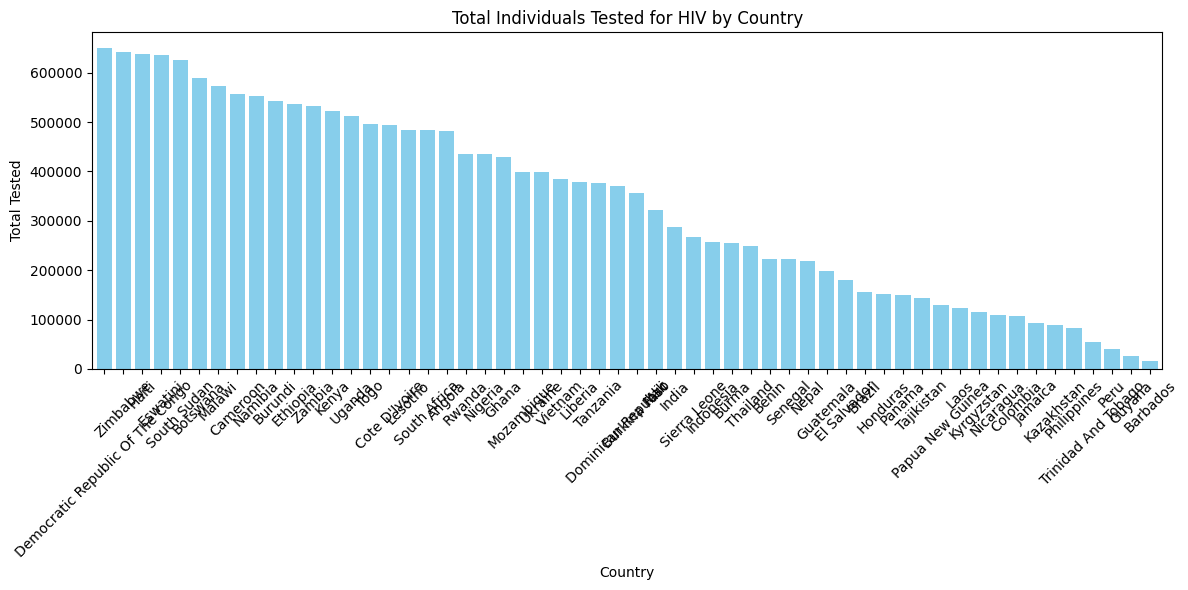

In [11]:
plt.figure(figsize=(12, 6))
country_totals = data_cleaned.groupby("Country")["Total_Tested"].sum().sort_values(ascending=False)
country_totals.plot(kind='bar', color='skyblue', width=0.8)
plt.title("Total Individuals Tested for HIV by Country")
plt.xlabel("Country")
plt.ylabel("Total Tested")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

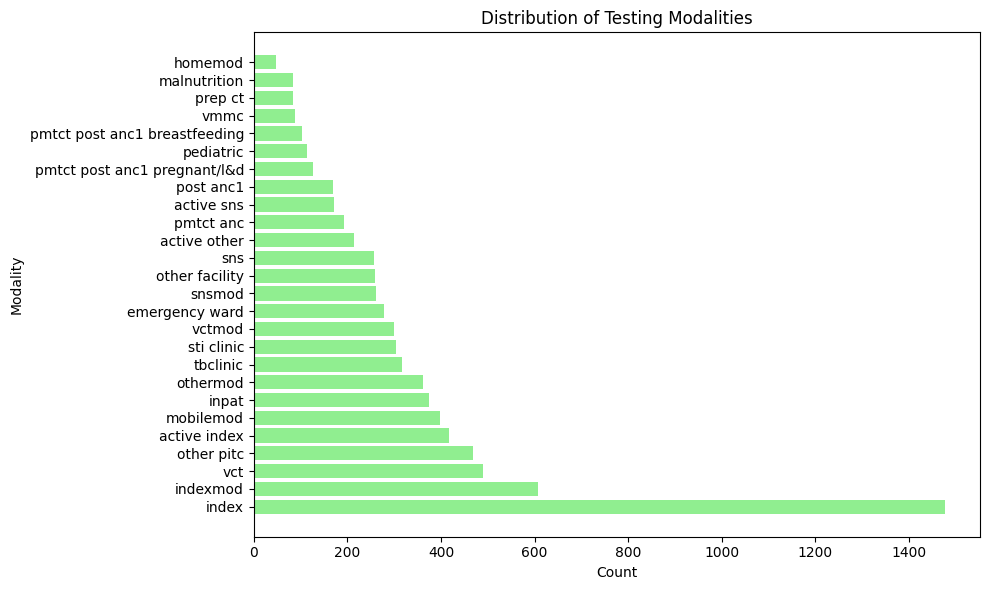

In [12]:
# Step 6: Visualization 2 - Distribution by Modality
plt.figure(figsize=(10, 6))
modality_totals = modality_counts.sort_values(ascending=False)
plt.barh(modality_totals.index, modality_totals.values, color='lightgreen')
plt.title("Distribution of Testing Modalities")
plt.xlabel("Count")
plt.ylabel("Modality")
plt.tight_layout()
plt.show()

In [13]:
country = "Angola"  # Specify a country for visualization
country_data = data_cleaned[data_cleaned["Country"] == country]
country_total = country_data[years].sum()

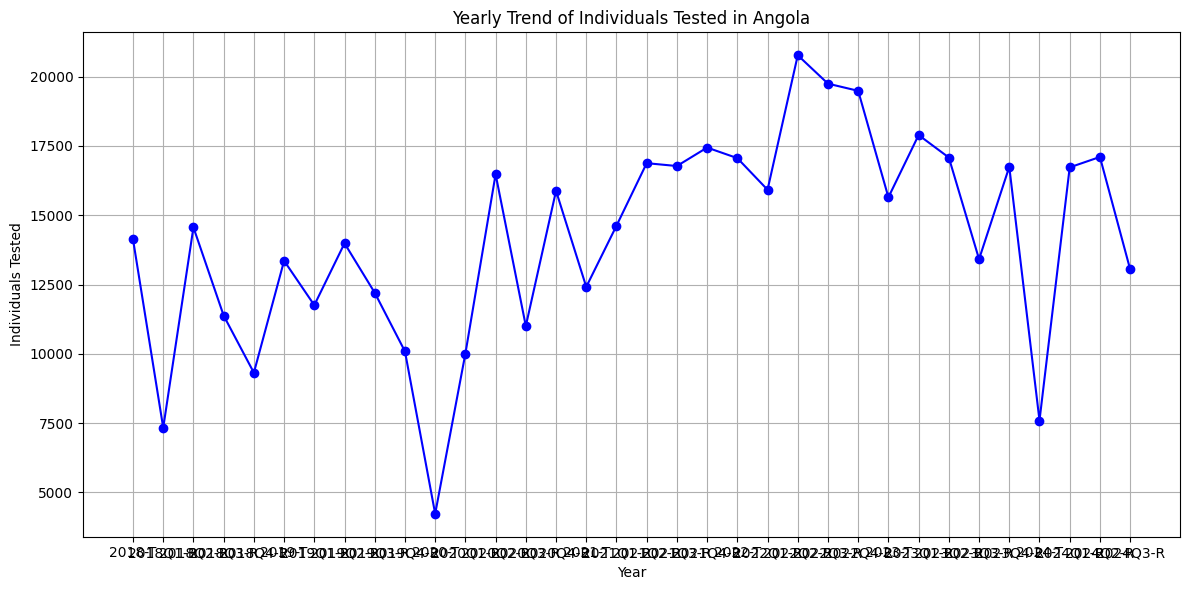

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(years, country_total.values, marker='o', linestyle='-', color='blue')
plt.title(f"Yearly Trend of Individuals Tested in {country}")
plt.xlabel("Year")
plt.ylabel("Individuals Tested")
plt.grid()
plt.tight_layout()
plt.show()

In [15]:
gender_group = data_cleaned['Sex'].value_counts()

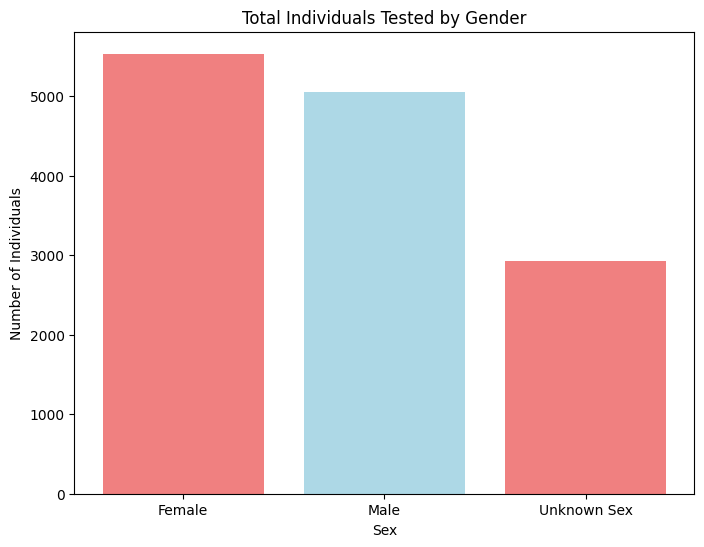

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(gender_group.index, gender_group.values, color=['lightcoral', 'lightblue'])
plt.title("Total Individuals Tested by Gender")
plt.xlabel("Sex")
plt.ylabel("Number of Individuals")
plt.show()

In [17]:
output_path = "cleaned_pepfar_data.csv"
data_cleaned.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to {output_path}")


Cleaned dataset saved to cleaned_pepfar_data.csv
